### <font color='blue'>分析の準備</font>

In [2]:
# ライブラリのimport
import numpy as np
import pandas as pd
# ライブラリのimport
import scipy as sp
from scipy import stats
# 表示桁数の指定
%precision 3
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# グラフをjupyter notebook内に表示
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm

/Users/Takanori/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# データの読み込み
beer = pd.read_csv("5-1-1-beer.csv")

In [5]:
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


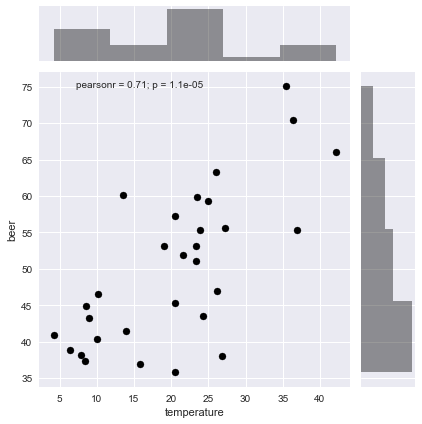

In [6]:
# まずは、図示！
# 横軸が気温で、縦軸が売上
sns.jointplot(x = "temperature", y="beer", data = beer, color="black")

### <font color='blue'>今回構築するモデル</font>

応答変数にビールの売上を、説明変数として気温を用いた正規線形モデル。<br>
今回はモデルの特定は、「気温がモデルに入るかどうか」である。<br>

・現象の解釈ができる<br>
係数$\beta_{1}$が0でないと判断できれば、「ビールの売上は気温の影響を受けている」と判断可能。<br>
係数$\beta_{1}$の正負がわかれば「気温が上がることによって、ビールの売上が上がるのか下がるのか」を判断可能。<br>
・予測ができる<br>

### <font color='blue'>モデル化</font>

In [7]:
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

### <font color='blue'>推定結果の表示と係数の検定</font>

In [8]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.11e-05
Time:                        15:34:58   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ここでInterceptとtempreatureの表をみる。<br>
p値をみると、桁落ちしているのがわかるので、ここで気温にかかる係数は有意に０とは異なるとわかる。<br>
気温が上がるといいのか、下がるといいのかは、(temperature - coef)をみると分かる。<br>

### <font color='blue'>AICによるモデル選択</font>

NULLモデルと「気温」という説明変数が入ったAICの比較をする。<br>

In [9]:
# NULLモデルの構築
null_model = smf.ols("beer ~ 1", data = beer).fit()

In [10]:
# nullモデルのAIC
null_model.aic

227.942

In [12]:
# 気温のみのAIC
lm_model.aic

208.909

#### <font color='blue'>nullモデルのAICについて</font>

In [13]:
# 対数尤度の取得
lm_model.llf

-102.455

In [14]:
# パラメタの数
lm_model.df_model

1.000

In [15]:
# 切片も推定されている
-2 * (lm_model.llf - (lm_model.df_model + 1))

208.909

In [16]:
null_model.llf

-112.971

In [17]:
null_model.df_model

0.000

In [18]:
# 切片も推定されている
-2 * (null_model.llf - (null_model.df_model + 1))

227.942